In [62]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

In [104]:
system=System(a=.05, b=.1, y=.1, r=.1)
t0 = 0
t_end = 1250
frame = TimeFrame(columns=('elk','wolves'))

,elk,wolves


In [105]:
def update_func(system,t, state):
    unpack(system)
    unpack(state)
    Elk,Wolves=state
    elk,wolves=state
   
    Elk+=a*elk-b*elk*wolves
    Wolves+=r*elk*wolves-y*wolves
    return State(elk=Elk, wolves=Wolves)

In [106]:
def run_simulation():
    
    frame = TimeFrame(columns=('elk','wolves'))
    frame.row[t0] = 1,1
    
    for t in linrange(t0, t_end):
        frame.row[t+1] = update_func(system,t,frame.row[t])
    return frame

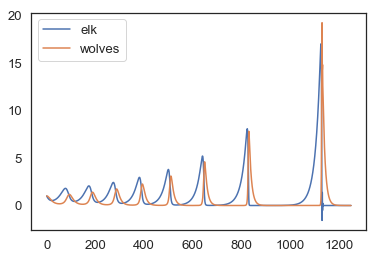

In [107]:
results=run_simulation()
results.plot()